# Plot isotropy

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import h5py as h5
import glob


In [2]:
# from matplotlib import interactive

# interactive(True)
# %matplotlib qt


In [3]:
plt.rcParams.update({
    "mathtext.fontset": "cm",
    "font.family": "STIXGeneral",
    "text.usetex": False,
    "axes.formatter.use_mathtext": True,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.labelsize": 14,
    'text.latex.preamble': '\boldmath'
})

# Load data with istropy

In [4]:
files = sorted(glob.glob("../data/high_order/mj_isotropy_mon_4*.h5"))

In [5]:
files

['../data/high_order/mj_isotropy_mon_4_grad.h5',
 '../data/high_order/mj_isotropy_mon_4_k_1.h5',
 '../data/high_order/mj_isotropy_mon_4_k_2.h5',
 '../data/high_order/mj_isotropy_mon_4_k_3.h5',
 '../data/high_order/mj_isotropy_mon_4_k_4.h5']

[ 1.   4.5  8.  11.5 15. ]
radius 7.4335275171506465
[ 1.   4.5  8.  11.5 15. ]
radius 7.41922030784529
[ 1.   4.5  8.  11.5 15. ]
radius 7.433432229506855
[ 1.   4.5  8.  11.5 15. ]
radius 7.432748395985928
[ 1.   4.5  8.  11.5 15. ]
radius 7.4335060866272995


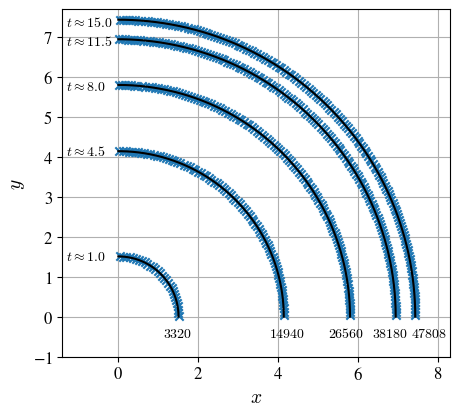

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4.6))
text_displacements = [0.1, 0.1, 0.12, 0.15, 0.15, 0.12]
node_text_displacement = [0.38, 0.38, 0.55, 0.6, 0.1, 0.1]

# ***************
# Cicular growth
# ***************
radiuses=[]
mean_angles_err=[]
max_angles_err=[]
for i, filepath in enumerate(files):
    data = h5.File(filepath, 'r')

    # Get groups.
    groups = list(data.keys())
    positions = []
    times = []
    types = []
    iterations = []
    for group in groups:
        if "step" not in group:
            continue

        positions.append(data[group]['domain']['pos'][:])
        times.append(data[group].attrs['time'])
        types.append(data[group]['domain']['types'][:])
        iterations.append(int(group.split('_')[-1]))

    dendrite_h = data['conf'].attrs.get('domain.dendrite.h')
    liquid_h = data['conf'].attrs.get('domain.liquid.h')

    # Close.
    data.close()

    # Set timesteps
    time_steps = np.linspace(1, 15, 5)
    print(time_steps)
    for disp_idx, time in enumerate(time_steps):
        closest_time = min(times, key=lambda x: abs(x-time))
        idx = times.index(closest_time)
        pos = positions[idx]

        # Extract only dendrite boundary. Only one quarter please.
        envelope_position_idx = list([i for i in range(len(
            types[idx])) if types[idx][i] == -2 and pos[0][i] >= 0 and pos[1][i] >= 0])
        envelope_positions = pos[:, envelope_position_idx]
        label = r"$\mathbf{n} \propto \nabla u$" if "grad" in filepath else r"$\mathbf{n} \propto {\gamma }''(k=3)$"
        if ("3" in filepath):
            ax.scatter(envelope_positions[0::20], envelope_positions[1::20], label=r'{}'.format(label) if (disp_idx == 0) else None, marker='.' if "grad" in filepath else 'x', color='tab:red' if "grad" in filepath else 'tab:blue', zorder=2 if not("grad" in filepath) else None)

        # circle.
        radius = np.mean(np.sqrt(envelope_positions[0]*envelope_positions[0] + envelope_positions[1]*envelope_positions[1]))
        if (time == time_steps[-1]):
            print('radius', radius)
            radiuses.append(radius)
        if ("k_3" in filepath ):
            step = np.linspace(0, np.pi * 0.5, 1000)
            x = radius * np.cos(step)
            y = radius * np.sin(step)
            ax.plot(x, y, '-k', alpha=1)
        
        if (i == 0):
            ax.text(-1.3, np.max(envelope_positions[1]) - text_displacements[disp_idx], r'$t \approx {:.1f}$'.format(time))
            ax.text(np.max(envelope_positions[0]) - node_text_displacement[disp_idx], -0.5, r'${}$'.format(iterations[idx]))

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.grid("both")
# ax.legend()
ax.set_xlim(left = -1.4, right= 8.3)
ax.set_ylim(bottom = -1, top=7.7)
ax.set_aspect('equal')

if 1:
    fig.savefig('../manuscript/paper/figures/isotropy_envelope_shapes.eps', dpi=300, transparent=False, bbox_inches='tight')

[ 1.   4.5  8.  11.5 15. ]
radius 7.4335275171506465
[ 1.   4.5  8.  11.5 15. ]
radius 7.41922030784529
[ 1.   4.5  8.  11.5 15. ]
radius 7.433432229506855
[ 1.   4.5  8.  11.5 15. ]
radius 7.432748395985928
[ 1.   4.5  8.  11.5 15. ]
radius 7.4335060866272995
../data/high_order/mj_isotropy_mon_4_grad.h5
max_angle_err 0.3070028469980315
mean_angle_err 0.004942313611647496
../data/high_order/mj_isotropy_mon_4_k_1.h5
max_angle_err 3.4166825165938706
mean_angle_err 0.015126445091920718
../data/high_order/mj_isotropy_mon_4_k_2.h5
max_angle_err 0.2821216356541356
mean_angle_err 0.00903604560129217
../data/high_order/mj_isotropy_mon_4_k_3.h5
max_angle_err 0.3042617537512484
mean_angle_err -0.0184894259917774
../data/high_order/mj_isotropy_mon_4_k_4.h5
max_angle_err 0.3401884933390704
mean_angle_err -0.0032622449534387135


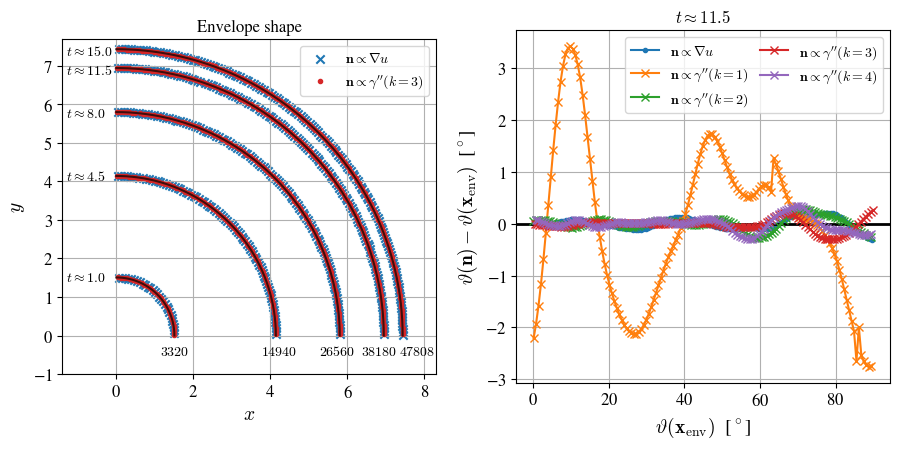

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4.6))
text_displacements = [0.1, 0.1, 0.12, 0.15, 0.15, 0.12]
node_text_displacement = [0.38, 0.38, 0.55, 0.6, 0.1, 0.1]

# ***************
# Cicular growth
# ***************
radiuses=[]
mean_angles_err=[]
max_angles_err=[]
ax = axs[0]
ax.set_title("Envelope shape")
for i, filepath in enumerate(files):
    data = h5.File(filepath, 'r')

    # Get groups.
    groups = list(data.keys())
    positions = []
    times = []
    types = []
    iterations = []
    for group in groups:
        if "step" not in group:
            continue

        positions.append(data[group]['domain']['pos'][:])
        times.append(data[group].attrs['time'])
        types.append(data[group]['domain']['types'][:])
        iterations.append(int(group.split('_')[-1]))

    dendrite_h = data['conf'].attrs.get('domain.dendrite.h')
    liquid_h = data['conf'].attrs.get('domain.liquid.h')

    # Close.
    data.close()

    # Set timesteps
    time_steps = np.linspace(1, 15, 5)
    print(time_steps)
    for disp_idx, time in enumerate(time_steps):
        closest_time = min(times, key=lambda x: abs(x-time))
        idx = times.index(closest_time)
        pos = positions[idx]

        # Extract only dendrite boundary. Only one quarter please.
        envelope_position_idx = list([i for i in range(len(
            types[idx])) if types[idx][i] == -2 and pos[0][i] >= 0 and pos[1][i] >= 0])
        envelope_positions = pos[:, envelope_position_idx]
        label = r"$\mathbf{n} \propto \nabla u$" if "grad" in filepath else r"$\mathbf{n} \propto {\gamma }''(k=3)$"
        if ("3" in filepath) or ("grad" in filepath):
            ax.scatter(envelope_positions[0::20], envelope_positions[1::20], label=r'{}'.format(label) if (disp_idx == 0) else None, marker='x' if "grad" in filepath else '.', color='tab:blue' if "grad" in filepath else 'tab:red', zorder=2 if not("grad" in filepath) else None)

        # circle.
        radius = np.mean(np.sqrt(envelope_positions[0]*envelope_positions[0] + envelope_positions[1]*envelope_positions[1]))
        if (time == time_steps[-1]):
            print('radius', radius)
            radiuses.append(radius)
        if ("k_3" in filepath ):
            step = np.linspace(0, np.pi * 0.5, 1000)
            x = radius * np.cos(step)
            y = radius * np.sin(step)
            ax.plot(x, y, '-k', alpha=0.7)
        
        if (i == 0):
            ax.text(-1.3, np.max(envelope_positions[1]) - text_displacements[disp_idx], r'$t \approx {:.1f}$'.format(time))
            ax.text(np.max(envelope_positions[0]) - node_text_displacement[disp_idx], -0.5, r'${}$'.format(iterations[idx]))

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.grid("both")
ax.legend()
ax.set_xlim(left = -1.4, right= 8.3)
ax.set_ylim(bottom = -1, top=7.7)
ax.set_aspect('equal')

# ********
# Normals
# ********
ax = axs[1]

for i, filepath in enumerate(files):
    print(filepath)
    data = h5.File(filepath, 'r')

    # Get groups.
    groups = list(data.keys())
    positions = []
    normals = []
    times = []
    types = []
    iterations = []
    for group in groups:
        if "step" not in group:
            continue

        positions.append(data[group]['domain']['pos'][:])
        normals.append(data[group]['domain']['normals'][:])
        times.append(data[group].attrs['time'])
        types.append(data[group]['domain']['types'][:])
        iterations.append(int(group.split('_')[-1]))

    dendrite_h = data['conf'].attrs.get('domain.dendrite.h')
    liquid_h = data['conf'].attrs.get('domain.liquid.h')

    # Close.
    data.close()

    # Set timesteps
    time_steps = np.linspace(1, 15, 5)
    time = time_steps[-2]
    ax.set_title(r'$t \approx {:.1f}$'.format(time))
    disp_idx = list(time_steps).index(time)

    closest_time = min(times, key=lambda x: abs(x-time))
    idx = times.index(closest_time)
    pos = positions[idx]
    norms = normals[idx]

    # Extract only dendrite boundary. Only one quarter please.
    envelope_position_idx = list([i for i in range(len(
        types[idx])) if types[idx][i] == -2 and pos[0][i] >= 0 and pos[1][i] >= 0])
    envelope_positions = pos[:, envelope_position_idx]
    envelope_normals = norms[:, envelope_position_idx]

    ## Convert all to angles.
    envelope_pos_angles = [np.arctan2(y,x) * 180 / np.pi for x,y in zip(envelope_positions[0], envelope_positions[1])]
    envelope_normal_angles = [np.arctan2(-y,-x) * 180 / np.pi for x,y in zip(envelope_normals[0], envelope_normals[1])]

    envelope_angle_diff = list(np.array(envelope_pos_angles) - np.array(envelope_normal_angles))
    envelope_pos_angles, envelope_angle_diff = zip(*sorted(zip(envelope_pos_angles, envelope_angle_diff)))

    print('max_angle_err',np.max(np.abs(envelope_angle_diff)))
    print('mean_angle_err',np.mean(envelope_angle_diff))
    mean_angles_err.append(np.mean(envelope_angle_diff))
    max_angles_err.append(np.max(np.abs(envelope_angle_diff)))

    label = r"$\mathbf{n} \propto \nabla u$" if "grad" in filepath else (r"$\mathbf{n} \propto {\gamma }''($" + r"$k={})$".format(filepath.split('_')[-1].split('.h5')[0]))
    ax.plot(envelope_pos_angles, envelope_angle_diff, label=r"{}".format(label), marker='.' if "grad" in filepath else "x")
        
    # ax.axhline(np.mean(envelope_angle_diff), label=filepath)

    if (i == 0):
        ax.axhline(0, lw=2,c='k')
    # ax.set_ylim(bottom=-5,top=3.5)

ax.set_xlabel(r"$\vartheta (\mathbf{x}_\mathrm{env})$" + "  [$^\circ$]")
ax.set_ylabel(r"$\vartheta (\mathbf{n}) - \vartheta (\mathbf{x}_\mathrm{env})$" + "  [$^\circ$]")
ax.grid("both")
ax.legend(ncol=2, columnspacing=0.8)
fig.tight_layout()
# ax.set_aspect('equal')

if 0:
    fig.savefig('../manuscript/paper/figures/isotropy_growth.eps',
                dpi=300, transparent=False, bbox_inches='tight')


../data/high_order/mj_isotropy_mon_2_k_1.h5
max_angle_err 5.827412302562223
mean_angle_err -0.16398178502055427
../data/high_order/mj_isotropy_mon_2_k_2.h5
max_angle_err 3.295691162458386
mean_angle_err 0.07040670671621142
../data/high_order/mj_isotropy_mon_2_k_3.h5
max_angle_err 2.901768349061639
mean_angle_err -0.16618688701573797
../data/high_order/mj_isotropy_mon_2_k_4.h5
max_angle_err 3.4128335697043326
mean_angle_err -0.02144661514188534
../data/high_order/mj_isotropy_mon_4_k_1.h5
max_angle_err 3.4166825165938706
mean_angle_err 0.015126445091920718
../data/high_order/mj_isotropy_mon_4_k_2.h5
max_angle_err 0.2821216356541356
mean_angle_err 0.00903604560129217
../data/high_order/mj_isotropy_mon_4_k_3.h5
max_angle_err 0.3042617537512484
mean_angle_err -0.0184894259917774
../data/high_order/mj_isotropy_mon_4_k_4.h5
max_angle_err 0.3401884933390704
mean_angle_err -0.0032622449534387135


/tmp/ipykernel_60058/1362972134.py:159: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


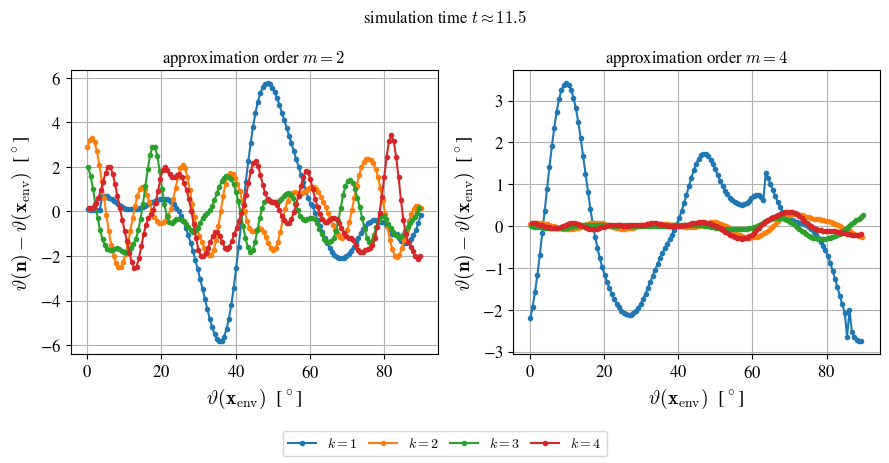

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4.6))
text_displacements = [0.1, 0.1, 0.12, 0.15, 0.15, 0.12]
node_text_displacement = [0.38, 0.38, 0.55, 0.6, 0.1, 0.1]

# ********
# Normals
# ********
ax = axs[0]
files = sorted(glob.glob("../data/high_order/mj_isotropy_mon_2*.h5"))
for i, filepath in enumerate(files):
    if "grad" in filepath:
        continue
    print(filepath)
    data = h5.File(filepath, 'r')

    # Get groups.
    groups = list(data.keys())
    positions = []
    normals = []
    times = []
    types = []
    iterations = []
    for group in groups:
        if "step" not in group:
            continue

        positions.append(data[group]['domain']['pos'][:])
        normals.append(data[group]['domain']['normals'][:])
        times.append(data[group].attrs['time'])
        types.append(data[group]['domain']['types'][:])
        iterations.append(int(group.split('_')[-1]))

    dendrite_h = data['conf'].attrs.get('domain.dendrite.h')
    liquid_h = data['conf'].attrs.get('domain.liquid.h')

    # Close.
    data.close()

    # Set timesteps
    time_steps = np.linspace(1, 15, 5)
    time = time_steps[-2]
    fig.suptitle("simulation time $t \\approx {}$".format(time))
    ax.set_title(r'approximation order $m = 2$')
    disp_idx = list(time_steps).index(time)

    closest_time = min(times, key=lambda x: abs(x-time))
    idx = times.index(closest_time)
    pos = positions[idx]
    norms = normals[idx]

    # Extract only dendrite boundary. Only one quarter please.
    envelope_position_idx = list([i for i in range(len(
        types[idx])) if types[idx][i] == -2 and pos[0][i] >= 0 and pos[1][i] >= 0])
    envelope_positions = pos[:, envelope_position_idx]
    envelope_normals = norms[:, envelope_position_idx]

    ## Convert all to angles.
    envelope_pos_angles = [np.arctan2(y,x) * 180 / np.pi for x,y in zip(envelope_positions[0], envelope_positions[1])]
    envelope_normal_angles = [np.arctan2(-y,-x) * 180 / np.pi for x,y in zip(envelope_normals[0], envelope_normals[1])]

    envelope_angle_diff = list(np.array(envelope_pos_angles) - np.array(envelope_normal_angles))
    envelope_pos_angles, envelope_angle_diff = zip(*sorted(zip(envelope_pos_angles, envelope_angle_diff)))

    print('max_angle_err',np.max(np.abs(envelope_angle_diff)))
    print('mean_angle_err',np.mean(envelope_angle_diff))
    mean_angles_err.append(np.mean(envelope_angle_diff))
    max_angles_err.append(np.max(np.abs(envelope_angle_diff)))

    label = r"$\mathbf{n} \propto \nabla u$" if "grad" in filepath else (r"$\mathbf{n} \propto {\gamma }''($" + r"$k={})$".format(filepath.split('_')[-1].split('.h5')[0]))
    ax.plot(envelope_pos_angles, envelope_angle_diff, label=r"{}".format(label), marker='x' if "grad" in filepath else ".")
        
    # ax.axhline(np.mean(envelope_angle_diff), label=filepath)

    if (i == 0):
        ax.axhline(0, lw=2,c='k')
    # ax.set_ylim(bottom=-5,top=3.5)

ax.set_xlabel(r"$\vartheta (\mathbf{x}_\mathrm{env})$" + "  [$^\circ$]")
ax.set_ylabel(r"$\vartheta (\mathbf{n}) - \vartheta (\mathbf{x}_\mathrm{env})$" + "  [$^\circ$]")
ax.grid("both")
fig.tight_layout()
# ax.set_aspect('equal')

# ********
# Normals
# ********
ax = axs[1]
files = sorted(glob.glob("../data/high_order/mj_isotropy_mon_4*.h5"))
for i, filepath in enumerate(files):
    if "grad" in filepath:
        continue
    print(filepath)
    data = h5.File(filepath, 'r')

    # Get groups.
    groups = list(data.keys())
    positions = []
    normals = []
    times = []
    types = []
    iterations = []
    for group in groups:
        if "step" not in group:
            continue

        positions.append(data[group]['domain']['pos'][:])
        normals.append(data[group]['domain']['normals'][:])
        times.append(data[group].attrs['time'])
        types.append(data[group]['domain']['types'][:])
        iterations.append(int(group.split('_')[-1]))

    dendrite_h = data['conf'].attrs.get('domain.dendrite.h')
    liquid_h = data['conf'].attrs.get('domain.liquid.h')

    # Close.
    data.close()

    # Set timesteps
    time_steps = np.linspace(1, 15, 5)
    time = time_steps[-2]
    ax.set_title(r'approximation order $m = 4$')
    disp_idx = list(time_steps).index(time)

    closest_time = min(times, key=lambda x: abs(x-time))
    idx = times.index(closest_time)
    pos = positions[idx]
    norms = normals[idx]

    # Extract only dendrite boundary. Only one quarter please.
    envelope_position_idx = list([i for i in range(len(
        types[idx])) if types[idx][i] == -2 and pos[0][i] >= 0 and pos[1][i] >= 0])
    envelope_positions = pos[:, envelope_position_idx]
    envelope_normals = norms[:, envelope_position_idx]

    ## Convert all to angles.
    envelope_pos_angles = [np.arctan2(y,x) * 180 / np.pi for x,y in zip(envelope_positions[0], envelope_positions[1])]
    envelope_normal_angles = [np.arctan2(-y,-x) * 180 / np.pi for x,y in zip(envelope_normals[0], envelope_normals[1])]

    envelope_angle_diff = list(np.array(envelope_pos_angles) - np.array(envelope_normal_angles))
    envelope_pos_angles, envelope_angle_diff = zip(*sorted(zip(envelope_pos_angles, envelope_angle_diff)))

    print('max_angle_err',np.max(np.abs(envelope_angle_diff)))
    print('mean_angle_err',np.mean(envelope_angle_diff))
    mean_angles_err.append(np.mean(envelope_angle_diff))
    max_angles_err.append(np.max(np.abs(envelope_angle_diff)))

    label = r"$\mathbf{n} \propto \nabla u$" if "grad" in filepath else (r"$k={}$".format(filepath.split('_')[-1].split('.h5')[0]))
    ax.plot(envelope_pos_angles, envelope_angle_diff, label=r"{}".format(label), marker='x' if "grad" in filepath else ".")
        
    # ax.axhline(np.mean(envelope_angle_diff), label=filepath)

    if (i == 0):
        ax.axhline(0, lw=2,c='k')
    # ax.set_ylim(bottom=-5,top=3.5)

ax.set_xlabel(r"$\vartheta (\mathbf{x}_\mathrm{env})$" + "  [$^\circ$]")
ax.set_ylabel(r"$\vartheta (\mathbf{n}) - \vartheta (\mathbf{x}_\mathrm{env})$" + "  [$^\circ$]")
ax.grid("both")
fig.tight_layout()
# ax.set_aspect('equal')
fig.subplots_adjust(bottom=0.23)   ##  Need to play with this number.
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(labels=labels, handles = handles, loc="lower center", ncol=5, columnspacing=0.8)

if 1:
    fig.savefig('../manuscript/paper/figures/isotropy_growth_angles.eps',
                dpi=300, transparent=False, bbox_inches='tight')


In [26]:
for i in range(len(files)):
    print(files[i], radiuses[i], radiuses[i] - radiuses[0])

../data/high_order/mj_isotropy_mon_4_grad.h5 7.4335275171506465 0.0
../data/high_order/mj_isotropy_mon_4_k_1.h5 7.41922030784529 -0.014307209305356672
../data/high_order/mj_isotropy_mon_4_k_2.h5 7.433432229506855 -9.528764379140853e-05
../data/high_order/mj_isotropy_mon_4_k_3.h5 7.432748395985928 -0.0007791211647187879
../data/high_order/mj_isotropy_mon_4_k_4.h5 7.4335060866272995 -2.1430523347021335e-05


In [27]:
for i in range(len(files)):
    print(files[i], max_angles_err[i], mean_angles_err[i], mean_angles_err[i] - mean_angles_err[0])

../data/high_order/mj_isotropy_mon_4_grad.h5 0.3070028469980315 0.004942313611647496 0.0
../data/high_order/mj_isotropy_mon_4_k_1.h5 3.4166825165938706 0.015126445091920718 0.010184131480273223
../data/high_order/mj_isotropy_mon_4_k_2.h5 0.2821216356541356 0.00903604560129217 0.004093731989644674
../data/high_order/mj_isotropy_mon_4_k_3.h5 0.3042617537512484 -0.0184894259917774 -0.023431739603424897
../data/high_order/mj_isotropy_mon_4_k_4.h5 0.3401884933390704 -0.0032622449534387135 -0.00820455856508621


# time evolution of normal and radii error

../data/smaller_timestep/mj_time_isotropy_mon_2_k_1.h5
../data/smaller_timestep/mj_time_isotropy_mon_2_k_2.h5
../data/smaller_timestep/mj_time_isotropy_mon_2_k_3.h5
../data/smaller_timestep/mj_time_isotropy_mon_2_k_4.h5
../data/smaller_timestep/mj_time_isotropy_mon_4_k_1.h5
../data/smaller_timestep/mj_time_isotropy_mon_4_k_2.h5
../data/smaller_timestep/mj_time_isotropy_mon_4_k_3.h5
../data/smaller_timestep/mj_time_isotropy_mon_4_k_4.h5


/tmp/ipykernel_60058/3965810141.py:68: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


../data/smaller_timestep/mj_time_isotropy_mon_2_k_1.h5
../data/smaller_timestep/mj_time_isotropy_mon_2_k_2.h5
../data/smaller_timestep/mj_time_isotropy_mon_2_k_3.h5
../data/smaller_timestep/mj_time_isotropy_mon_2_k_4.h5


/tmp/ipykernel_60058/3965810141.py:128: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


../data/smaller_timestep/mj_time_isotropy_mon_4_k_1.h5
../data/smaller_timestep/mj_time_isotropy_mon_4_k_2.h5
../data/smaller_timestep/mj_time_isotropy_mon_4_k_3.h5
../data/smaller_timestep/mj_time_isotropy_mon_4_k_4.h5


/tmp/ipykernel_60058/3965810141.py:143: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


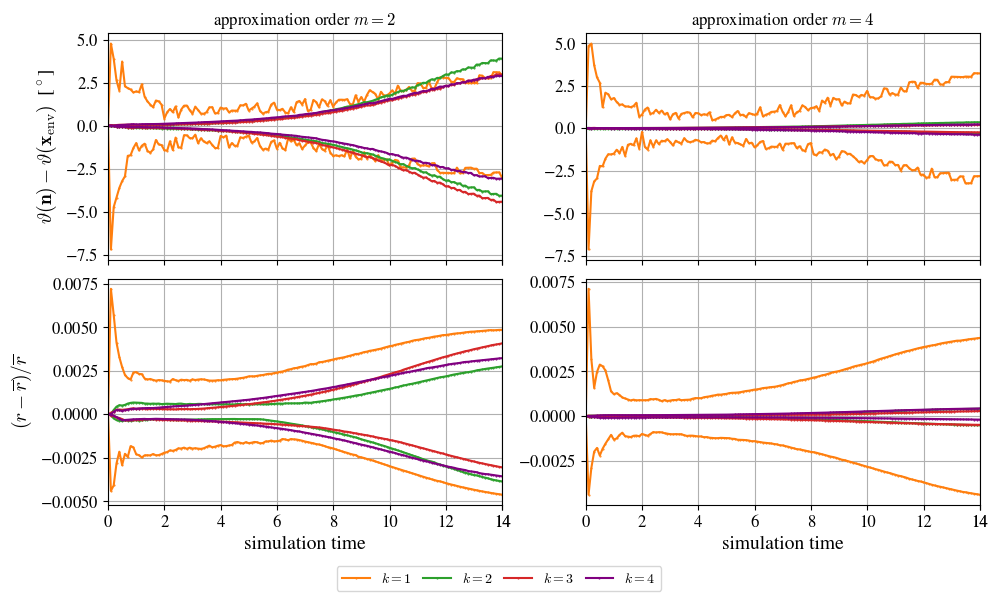

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "purple"]

_files = [sorted(glob.glob("../data/smaller_timestep//mj_time_isotropy_mon_2*.h5")), sorted(glob.glob("../data/smaller_timestep/mj_time_isotropy_mon_4*.h5"))]

# ********
# Normals
# ********
for files, ax in zip(_files, axs[0]):
    mon_order = files[0].split("mon_")[-1].split("_")[0]
    ax.set_title("approximation order $m= {}$".format(mon_order))
    
    for i, filepath in enumerate(files):
        if "grad" in filepath:
            continue
        print(filepath)
        try:
            spline_order = int(filepath.split("k_")[-1].split(".")[0])
        except:
            spline_order = 0

        with h5.File(filepath, 'r') as data:
            # Get groups.
            groups = list(data.keys())
            positions = []
            normals = []
            times = []
            types = []
            for group in groups:
                if "step" not in group:
                    continue

                positions.append(data[group]['domain']['pos'][:])
                normals.append(data[group]['domain']['normals'][:])
                times.append(data[group].attrs['time'])
                types.append(data[group]['domain']['types'][:])

        # Set timesteps
        max_angle_diffs = []
        min_angle_diffs = []
        for idx, time_step in enumerate(times):
            if time_step > 14:
                continue
            pos = positions[idx]
            norms = normals[idx]

            # Extract only dendrite boundary. Only one quarter please.
            envelope_position_idx = list([i for i in range(len(
                types[idx])) if types[idx][i] == -2 and pos[0][i] >= 0 and pos[1][i] >= 0])
            envelope_positions = pos[:, envelope_position_idx]
            envelope_normals = norms[:, envelope_position_idx]

            # Convert all to angles.
            envelope_pos_angles = [np.arctan2(y,x) * 180 / np.pi for x,y in zip(envelope_positions[0], envelope_positions[1])]
            envelope_normal_angles = [np.arctan2(-y,-x) * 180 / np.pi for x,y in zip(envelope_normals[0], envelope_normals[1])]

            envelope_angle_diff = list(np.array(envelope_pos_angles) - np.array(envelope_normal_angles))
            envelope_pos_angles, envelope_angle_diff = zip(*sorted(zip(envelope_pos_angles, envelope_angle_diff)))

            max_angle_diffs.append(np.max(envelope_angle_diff))
            min_angle_diffs.append(np.min(envelope_angle_diff))

        label = r"$\mathbf{n} \propto \nabla u$" if "grad" in filepath else (r"$k={}$".format(filepath.split('_')[-1].split('.h5')[0]))
        ax.plot([t for t in times if t <= 14], max_angle_diffs, marker=".", color=colors[i], label="{}".format(label), ms=1)
        ax.plot([t for t in times if t <= 14], min_angle_diffs, marker=".", color=colors[i], label=None, ms=1)
    
    ax.grid("both")
    fig.tight_layout()
    # ax.set_aspect('equal')
    ax.set_xmargin(0)


# ********
# Radiuses
# ********
for files, ax in zip(_files, axs[1]):
    mon_order = files[0].split("mon_")[-1].split("_")[0]
    
    for i, filepath in enumerate(files):
        if "grad" in filepath:
            continue
        print(filepath)
        try:
            spline_order = int(filepath.split("k_")[-1].split(".")[0])
        except:
            spline_order = 0

        with h5.File(filepath, 'r') as data:
            # Get groups.
            groups = list(data.keys())
            positions = []
            normals = []
            times = []
            types = []
            for group in groups:
                if "step" not in group:
                    continue

                positions.append(data[group]['domain']['pos'][:])
                times.append(data[group].attrs['time'])
                types.append(data[group]['domain']['types'][:])

        # Set timesteps
        max_radiuses = []
        min_radiuses = []
        mean_radiuses = []
        for idx, time_step in enumerate(times):
            if time_step > 14:
                continue
            pos = positions[idx]

            # Extract only dendrite boundary. Only one quarter please.
            envelope_position_idx = list([i for i in range(len(
                types[idx])) if types[idx][i] == -2 and pos[0][i] >= 0 and pos[1][i] >= 0])
            envelope_positions = pos[:, envelope_position_idx]

            radiuses = np.sqrt(envelope_positions[0]*envelope_positions[0] + envelope_positions[1]*envelope_positions[1])
            mean_radiuses.append(np.mean(radiuses))
            max_radiuses.append(np.max(radiuses))
            min_radiuses.append(np.min(radiuses))

        label = r"$\mathbf{n} \propto \nabla u$" if "grad" in filepath else (r"$k={}$".format(filepath.split('_')[-1].split('.h5')[0]))
        delta_t = times[idx + 1] - times[idx] if (time_step != times[-1]) else times[-1] - times[-2]
        ax.plot([t for t in times if t <= 14],[(r - r_0) / r_0 for r, r_0 in zip(max_radiuses, mean_radiuses)], marker=".", color=colors[i], label="{}".format(label) , ms=1)
        ax.plot([t for t in times if t <= 14],[(r - r_0) / r_0 for r, r_0 in zip(min_radiuses, mean_radiuses)], marker=".", color=colors[i], label=None, ms=1)
    
    ax.grid("both")
    fig.tight_layout()
    # ax.set_aspect('equal')
    ax.set_xmargin(0)

axs[0,0].set_ylabel(r"$\vartheta (\mathbf{n}) - \vartheta (\mathbf{x}_\mathrm{env})$" + "  [$^\circ$]")
axs[1,0].set_ylabel(r"$(r - \overline{r}) / \overline{r}$")
axs[1,0].set_xlabel(r"simulation time")
axs[1,1].set_xlabel(r"simulation time")
ticks = list(axs[1, 0].get_xticks())
ticks = [int(t) for t in ticks]
ticks.append(14)
axs[1,0].set_xticks(ticks)
axs[1,0].set_xticklabels(ticks)
axs[1,1].set_xticks(ticks)
axs[1,1].set_xticklabels(ticks)
fig.tight_layout() 
fig.subplots_adjust(bottom=0.15)   ##  Need to play with this number.
handles, labels = ax.get_legend_handles_labels()
fig.legend(labels=labels, handles = handles, loc="lower center", ncol=5, columnspacing=0.8)


if 1:
    fig.savefig('../manuscript/paper/figures/isotropy_growth_time_evolution.eps',
                dpi=300, transparent=False, bbox_inches='tight')

In [29]:
ticks

[0, 2, 4, 6, 8, 10, 12, 14, 14]

## plot radiuses

In [30]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [31]:
# ***************
# Cicular growth radiuses
# ***************
mean_r =[]
min_r =[]
max_r =[]
min_angle_err = []
max_angle_err = []
# _files = [sorted(glob.glob("../data/high_order/mj_isotropy_mon_2_*.h5")), sorted(glob.glob("../data/high_order/mj_isotropy_mon_4_*.h5"))]
_files = [sorted(glob.glob("../data/smaller_timestep/mj_time_isotropy_mon_2*.h5")), sorted(glob.glob("../data/smaller_timestep/mj_time_isotropy_mon_4*.h5"))]

for files, ax in zip(_files, axs):
    approx_mean_r =[]
    approx_min_r =[]
    approx_max_r =[]
    approx_min_angle_err = []
    approx_max_angle_err = []
    for i, filepath in enumerate(files):
        print(filepath)
        data = h5.File(filepath, 'r')

        # Get groups.
        groups = list(data.keys())
        positions = []
        normals = []
        times = []
        types = []
        iterations = []
        for group in groups:
            if "step" not in group:
                continue

            positions.append(data[group]['domain']['pos'][:])
            normals.append(data[group]['domain']['normals'][:])
            times.append(data[group].attrs['time'])
            types.append(data[group]['domain']['types'][:])
            iterations.append(int(group.split('_')[-1]))

        dendrite_h = data['conf'].attrs.get('domain.dendrite.h')
        liquid_h = data['conf'].attrs.get('domain.liquid.h')

        # Close.
        data.close()

        # Set timesteps
        time, idx = find_nearest(np.array(times), 14)
        pos = positions[idx]
        norms = normals[idx]

        # Extract only dendrite boundary. Only one quarter please.
        envelope_position_idx = list([i for i in range(len(
            types[idx])) if types[idx][i] == -2 and pos[0][i] >= 0 and pos[1][i] >= 0])
        envelope_positions = pos[:, envelope_position_idx]
        envelope_normals = norms[:, envelope_position_idx]

        # circle.
        radiuses = np.sqrt(envelope_positions[0]*envelope_positions[0] + envelope_positions[1]*envelope_positions[1])
        approx_mean_r.append(np.mean(radiuses))
        approx_min_r.append(np.min(radiuses))
        approx_max_r.append(np.max(radiuses))

        ## Convert all to angles.
        envelope_pos_angles = [np.arctan2(y,x) * 180 / np.pi for x,y in zip(envelope_positions[0], envelope_positions[1])]
        envelope_normal_angles = [np.arctan2(-y,-x) * 180 / np.pi for x,y in zip(envelope_normals[0], envelope_normals[1])]

        envelope_angle_diff = list(np.array(envelope_pos_angles) - np.array(envelope_normal_angles))
        envelope_pos_angles, envelope_angle_diff = zip(*sorted(zip(envelope_pos_angles, envelope_angle_diff)))

        approx_min_angle_err.append(np.min(envelope_angle_diff))
        approx_max_angle_err.append(np.max(envelope_angle_diff)) 
    mean_r.append(approx_mean_r)
    min_r.append(approx_min_r)
    max_r.append(approx_max_r)
    min_angle_err.append(approx_min_angle_err)
    max_angle_err.append(approx_max_angle_err)

../data/smaller_timestep/mj_time_isotropy_mon_2_grad.h5
../data/smaller_timestep/mj_time_isotropy_mon_2_k_1.h5


../data/smaller_timestep/mj_time_isotropy_mon_2_k_2.h5
../data/smaller_timestep/mj_time_isotropy_mon_2_k_3.h5
../data/smaller_timestep/mj_time_isotropy_mon_2_k_4.h5
../data/smaller_timestep/mj_time_isotropy_mon_4_grad.h5
../data/smaller_timestep/mj_time_isotropy_mon_4_k_1.h5
../data/smaller_timestep/mj_time_isotropy_mon_4_k_2.h5
../data/smaller_timestep/mj_time_isotropy_mon_4_k_3.h5
../data/smaller_timestep/mj_time_isotropy_mon_4_k_4.h5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


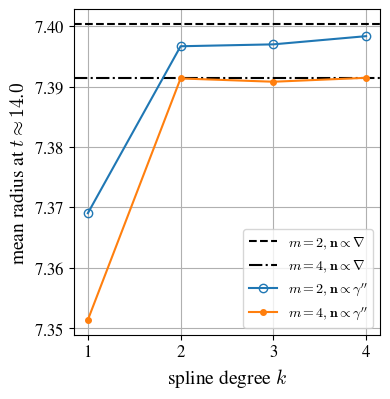

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4.1))

ax.axhline(mean_r[0][0],c='k', linestyle="dashed", lw=1.5, label=r"$m = 2, \mathbf{n} \propto  \nabla$")
ax.axhline(mean_r[1][0],c='k', linestyle="dashdot", lw=1.5, label=r"$m = 4, \mathbf{n} \propto  \nabla$")
ax.plot([1,2,3,4], mean_r[0][1:],'-', label=r"$m = 2, \mathbf{n} \propto {\gamma}''$",  marker='o', fillstyle='none')
ax.plot([1,2,3,4], mean_r[1][1:],'.-', label=r"$m = 4, \mathbf{n} \propto {\gamma}''$", ms=8)
ax.set_ylabel(r"mean radius at $t\approx {:.1f}$".format(time))
ax.set_xlabel("spline degree $k$")
ax.legend()
ax.grid()

ax.set_xticks([1,2,3,4])
ax.set_xticklabels([1,2,3,4])

fig.tight_layout()

if 1:
    fig.savefig('../manuscript/paper/figures/radiuses_isotropy.eps',
                dpi=300, transparent=False, bbox_inches='tight')

In [33]:
from num2tex import num2tex
from num2tex import configure as num2tex_configure
num2tex_configure(exp_format='cdot')

num2tex configure options:
 - help_text: boolean whether this help text is displayed when configure() is called
 - exp_format: string format specification for how the power of 10 is displayed in scientific format.
     - also accepts specifiers 'times', which is converted to '\times 10^{}', 'cdot': '\cdot 10^{}', and 'parentheses': '(10^{})'
 - display_singleton: boolean on whether the "1 \times" is printed in "1 \times 10^{p}"
          


In [34]:
for id, files in enumerate(_files):
    for i, file in enumerate(files):
        try:
            spline_order = int(file.split("k_")[-1].split(".")[0])
        except:
            spline_order = 0

        if ("grad" in file):
            print("& ${:.4f}$ & ${:.4f}$ & ${:.4f}$ & ${:.4f}$ & ${:.4f}$ \\\\".format(mean_r[id][i], mean_r[id][i] - min_r[id][i], max_r[id][i] - mean_r[id][i], max_angle_err[id][i], min_angle_err[id][i])) 
        else:
            print("& ${:.4f}$ & ${:.4f}$ & ${:.4f}$ & ${:.4f}$ & ${:.4f}$ \\\\".format(mean_r[id][i], mean_r[id][i] - min_r[id][i], max_r[id][i] - mean_r[id][i], max_angle_err[id][i], min_angle_err[id][i]))


& $7.4004$ & $0.0257$ & $0.0226$ & $2.6285$ & $-4.1683$ \\
& $7.3690$ & $0.0340$ & $0.0357$ & $2.9411$ & $-3.0012$ \\
& $7.3967$ & $0.0285$ & $0.0203$ & $3.9000$ & $-4.0700$ \\
& $7.3970$ & $0.0225$ & $0.0301$ & $2.9738$ & $-4.4241$ \\
& $7.3983$ & $0.0263$ & $0.0238$ & $2.8899$ & $-3.0776$ \\
& $7.3914$ & $0.0051$ & $0.0035$ & $0.5215$ & $-0.4200$ \\
& $7.3514$ & $0.0322$ & $0.0321$ & $3.2313$ & $-2.8206$ \\
& $7.3913$ & $0.0037$ & $0.0031$ & $0.3517$ & $-0.2851$ \\
& $7.3908$ & $0.0036$ & $0.0021$ & $0.2039$ & $-0.2423$ \\
& $7.3914$ & $0.0014$ & $0.0032$ & $0.2227$ & $-0.3810$ \\
